In [6]:
pip install pandas sqlalchemy matplotlib seaborn pymysql


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [13]:
import pandas as pd
from sqlalchemy import create_engine



# Replace with your own credentials:
username = "root"          # or your MySQL username
password = "roor" # your MySQL password
host = "localhost"
database = "airbnb_db"     # the DB you created earlier

engine = create_engine(f"mysql+pymysql://{username}:{password}@{host}/{database}")


In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", palette="pastel")


1.Total listings

In [15]:
query = "SELECT COUNT(*) AS total_listings FROM listings"
df = pd.read_sql(query, engine)
print(df)


   total_listings
0             291


2.Listings per Room Type

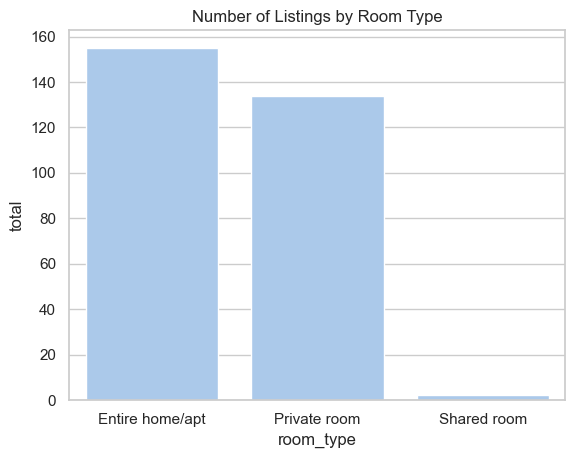

In [16]:
query = """
SELECT room_type, COUNT(*) AS total
FROM listings
GROUP BY room_type
ORDER BY total DESC
"""
df = pd.read_sql(query, engine)

sns.barplot(x="room_type", y="total", data=df)
plt.title("Number of Listings by Room Type")
plt.show()


3. Average Price by Neighbourhood Group

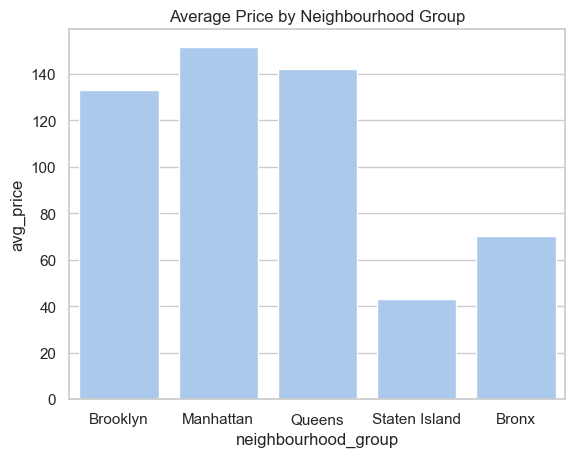

In [17]:
query = """
SELECT neighbourhood_group, AVG(price) AS avg_price
FROM listings
GROUP BY neighbourhood_group
"""
df = pd.read_sql(query, engine)

sns.barplot(x="neighbourhood_group", y="avg_price", data=df)
plt.title("Average Price by Neighbourhood Group")
plt.show()


4. Top 10 Most Expensive Listings

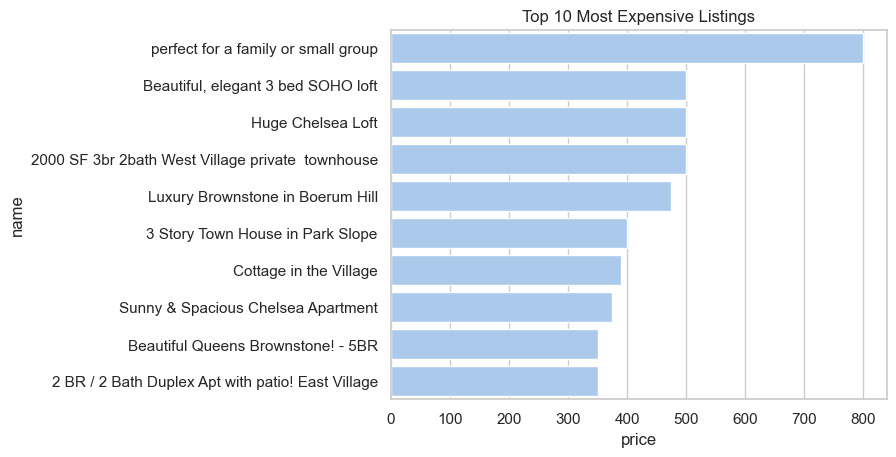

In [18]:
query = """
SELECT id, name, price, neighbourhood_group, room_type
FROM listings
ORDER BY price DESC
LIMIT 10
"""
df = pd.read_sql(query, engine)

sns.barplot(x="price", y="name", data=df, orient="h")
plt.title("Top 10 Most Expensive Listings")
plt.show()


5. Top 10 Hosts with Most Listings

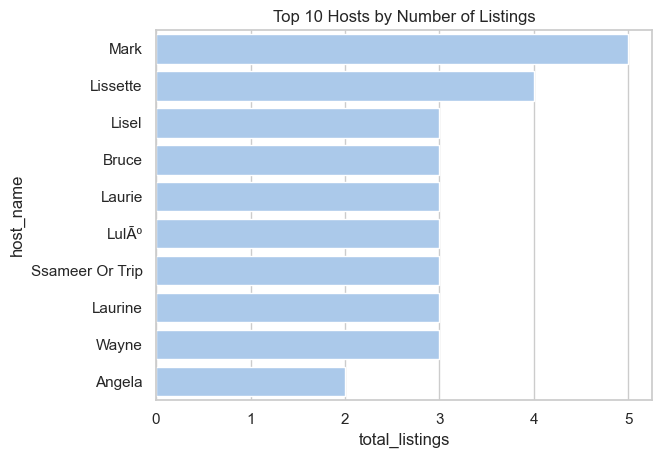

In [19]:
query = """
SELECT host_id, host_name, COUNT(*) AS total_listings
FROM listings
GROUP BY host_id, host_name
ORDER BY total_listings DESC
LIMIT 10
"""
df = pd.read_sql(query, engine)

sns.barplot(x="total_listings", y="host_name", data=df, orient="h")
plt.title("Top 10 Hosts by Number of Listings")
plt.show()


6. Neighbourhood with Highest Average Reviews

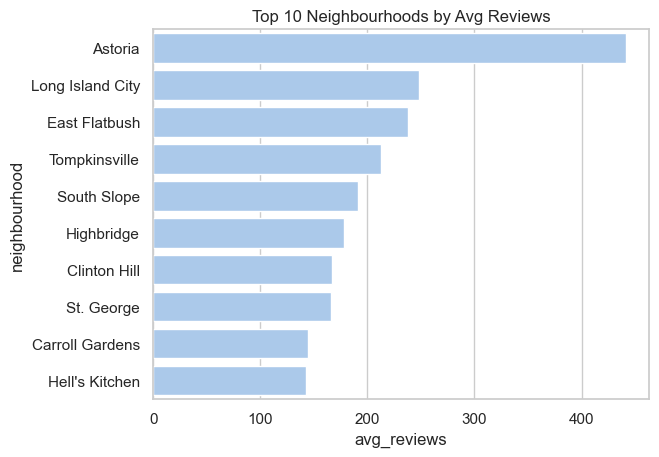

In [20]:
query = """
SELECT neighbourhood, AVG(number_of_reviews) AS avg_reviews
FROM listings
GROUP BY neighbourhood
ORDER BY avg_reviews DESC
LIMIT 10
"""
df = pd.read_sql(query, engine)

sns.barplot(x="avg_reviews", y="neighbourhood", data=df, orient="h")
plt.title("Top 10 Neighbourhoods by Avg Reviews")
plt.show()


7. Avg Price per Room Type in Each Neighbourhood Group

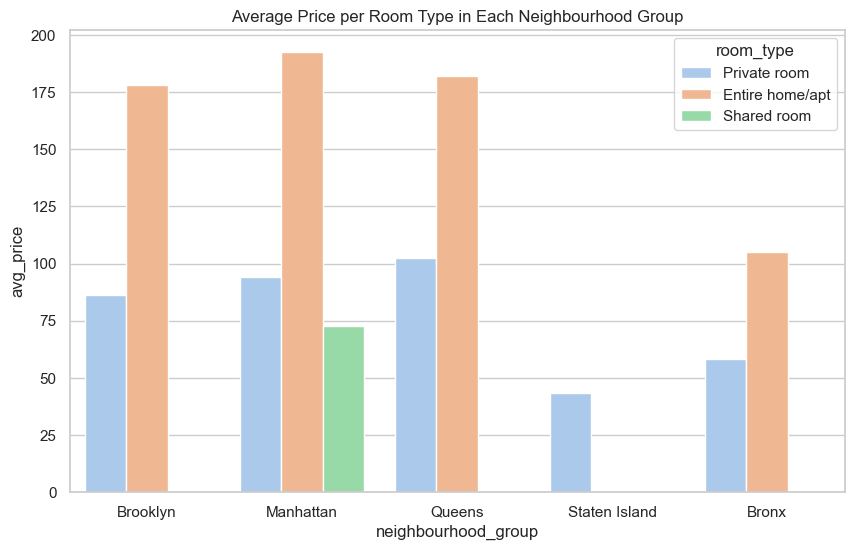

In [21]:
query = """
SELECT neighbourhood_group, room_type, AVG(price) AS avg_price
FROM listings
GROUP BY neighbourhood_group, room_type
"""
df = pd.read_sql(query, engine)

plt.figure(figsize=(10,6))
sns.barplot(x="neighbourhood_group", y="avg_price", hue="room_type", data=df)
plt.title("Average Price per Room Type in Each Neighbourhood Group")
plt.show()


8. % of Listings Available All Year

In [22]:
query = """
SELECT 
    COUNT(CASE WHEN availability_365 = 365 THEN 1 END) * 100.0 / COUNT(*) AS percent_available_all_year
FROM listings
"""
df = pd.read_sql(query, engine)
print("Listings Available All Year (%):", df.iloc[0,0])


Listings Available All Year (%): 5.84192


9. Abnormal Minimum Nights (Fraud Detection)

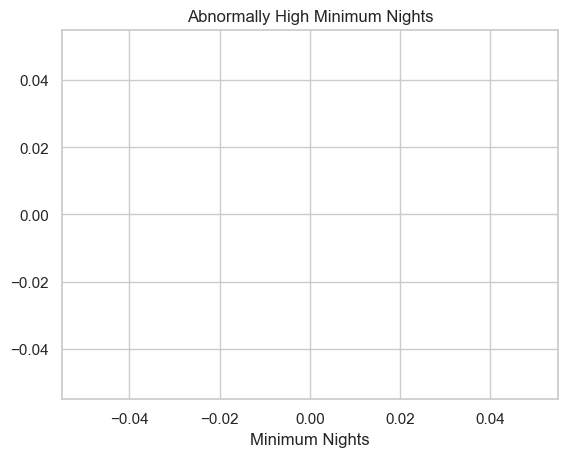

In [24]:
query = """
SELECT id, name, host_name, minimum_nights
FROM listings
WHERE minimum_nights > 365
ORDER BY minimum_nights DESC

"""
df = pd.read_sql(query, engine)

sns.histplot(df["minimum_nights"], bins=20)
plt.title("Abnormally High Minimum Nights")
plt.xlabel("Minimum Nights")
plt.show()


10. Most Popular Neighbourhoods by Total Reviews

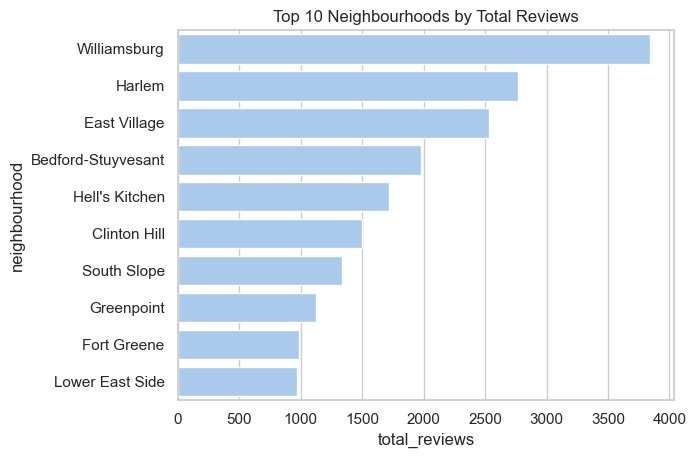

In [25]:
query = """
SELECT neighbourhood, SUM(number_of_reviews) AS total_reviews
FROM listings
GROUP BY neighbourhood
ORDER BY total_reviews DESC
LIMIT 10
"""
df = pd.read_sql(query, engine)

sns.barplot(x="total_reviews", y="neighbourhood", data=df, orient="h")
plt.title("Top 10 Neighbourhoods by Total Reviews")
plt.show()
